In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [14]:
labels_3_SAM = np.load("../compressed_data/Small_UM_Labels_4503_Z_3.npy").astype(int)
W_500_w_test_SAM = np.load("../compressed_data/4802_tke_UM.npy")
EQ_1_ww_test_SAM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_UM_profile.npy")
ifs_land_frac = np.load("../compressed_data/Figure_2_UM_LAND_FRAC.npy")
z_test_tsne_track_31_sam = np.load('../compressed_data/Small_UM_3D_PCA_Latent_Space__4503.npy')

# 4 Panel Figure For SI Paper

Text(0.5, 0.95, 'UM Trained VAE 3D Latent Space Projections')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found.

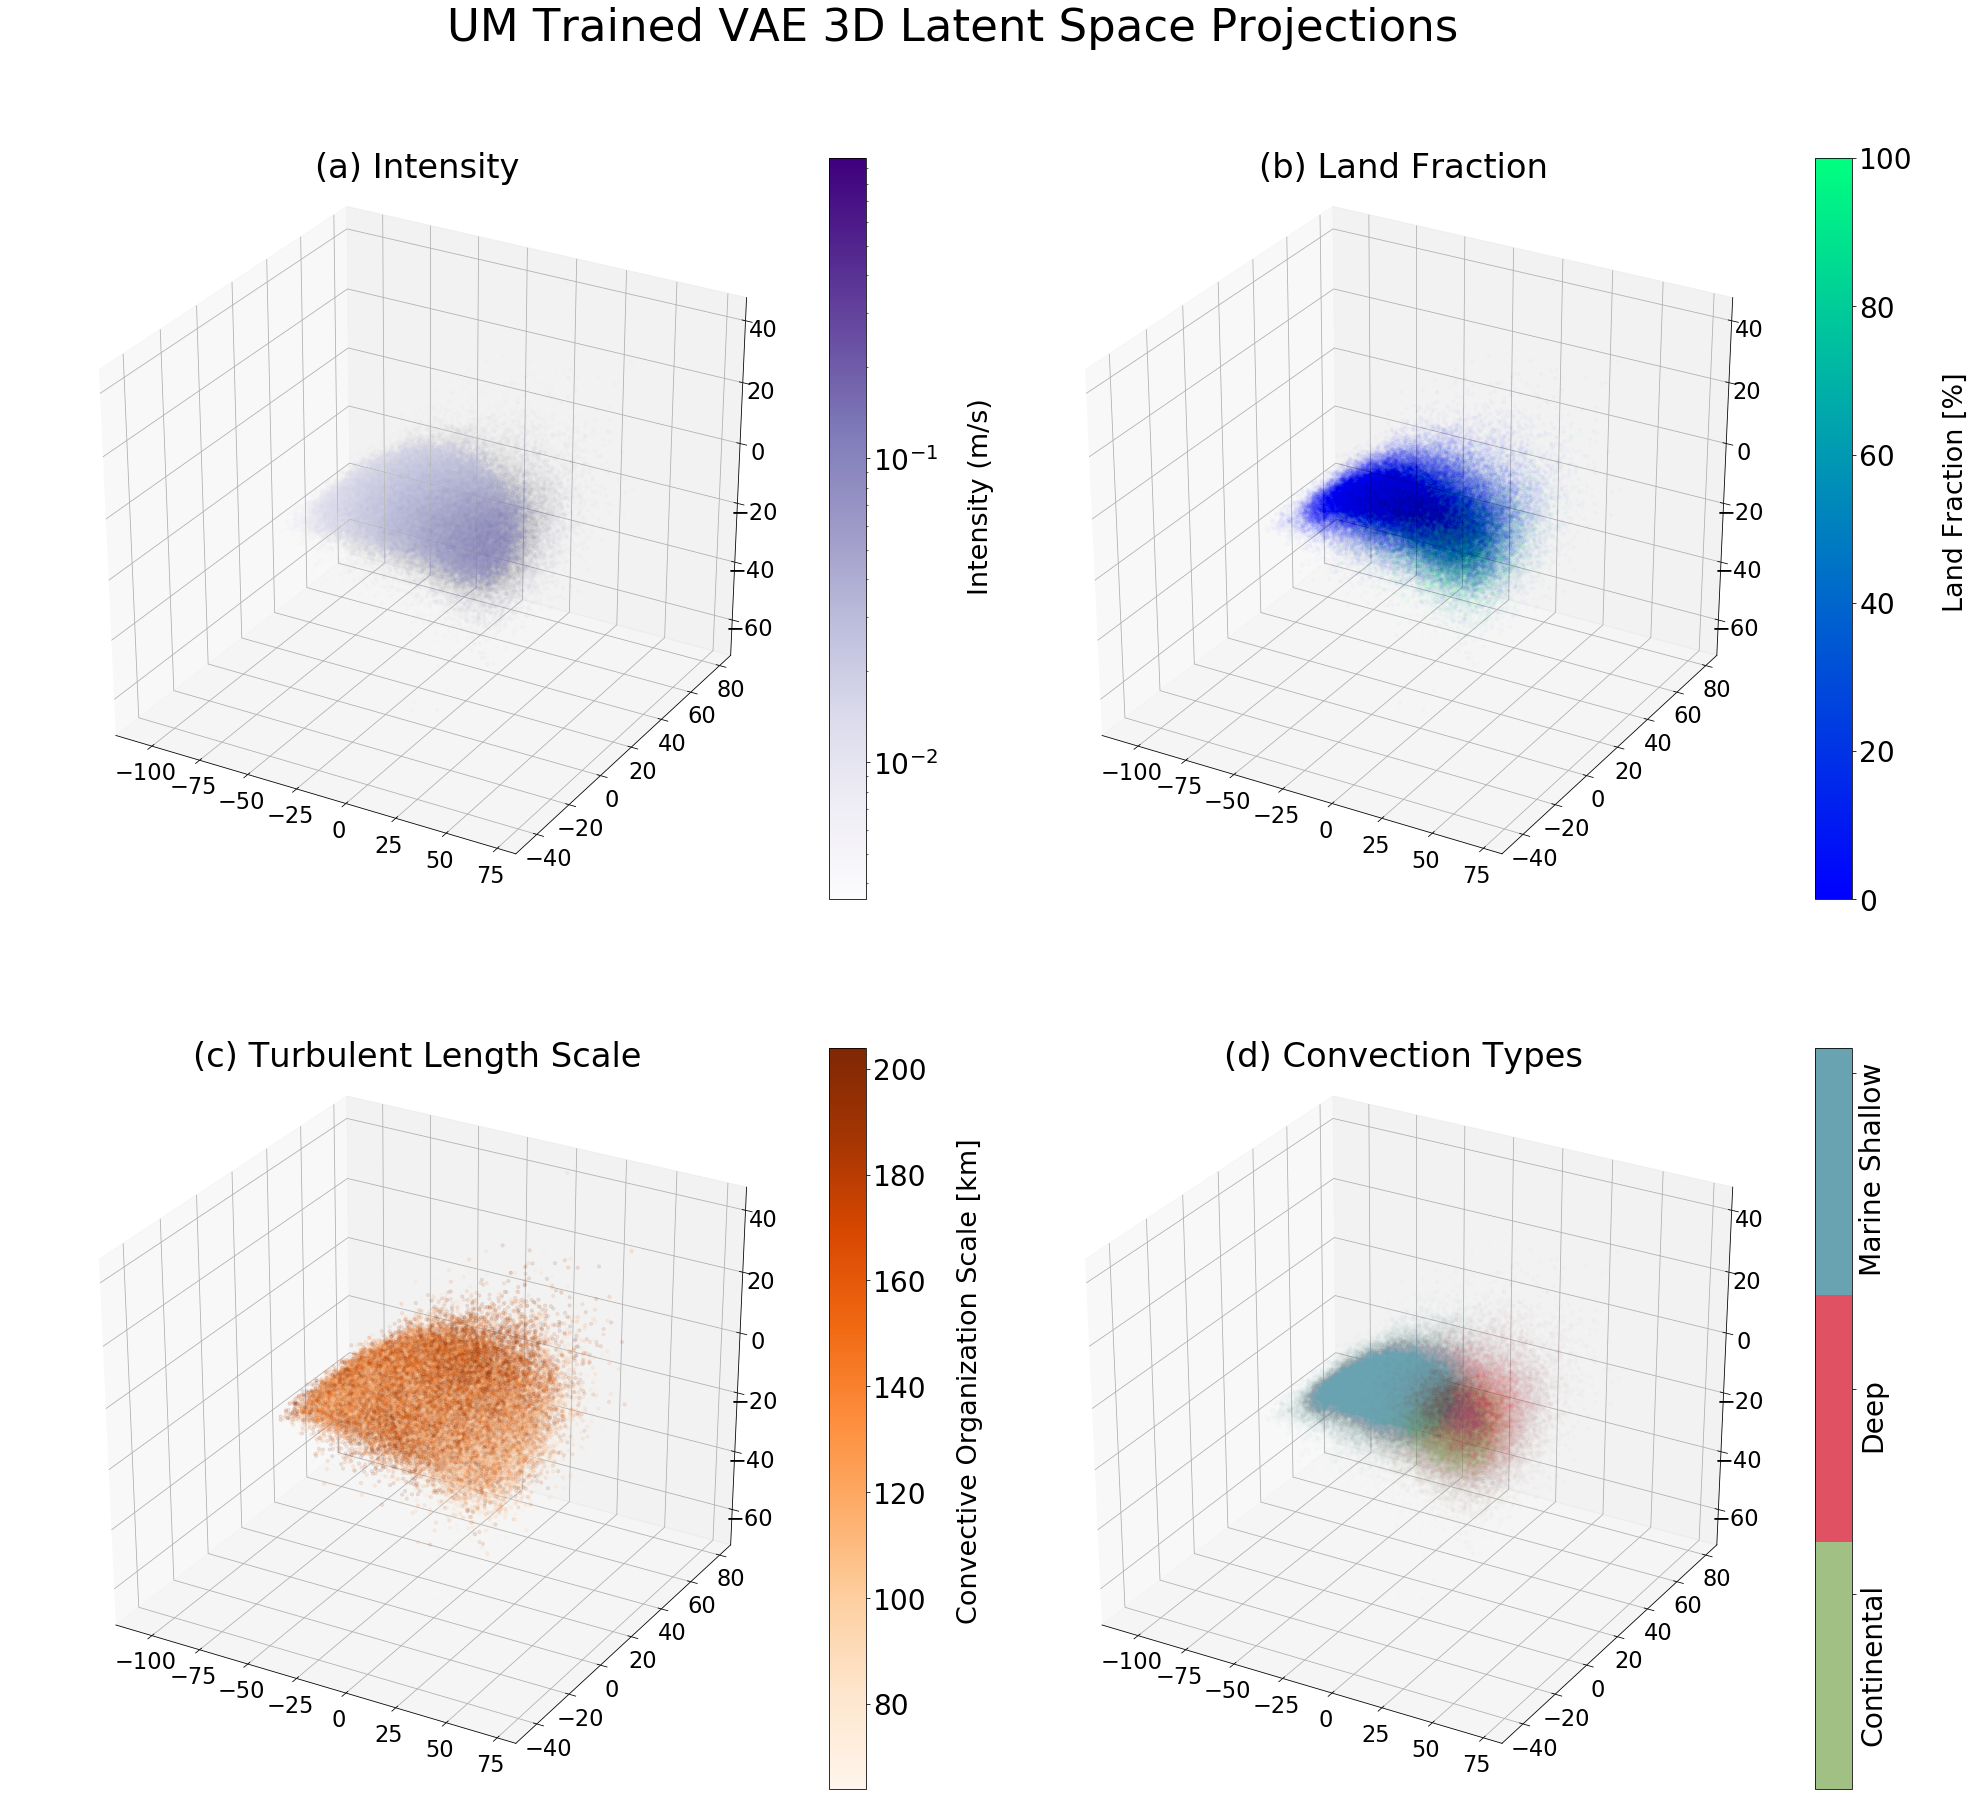

In [15]:
fig, ax = plt.subplots(2,2,figsize=(35,30))
gs=GridSpec(2,2)

xmin = -115
xmax = 80
ymin = -50
ymax = 85
zmin = -70
zmax = 45

vmin = 0.01
vmax = 1
fac = 1.25

ax1 = fig.add_subplot(gs[0,0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=W_500_w_test_SAM, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), alpha=0.01)
ax1.set_title("(a) Intensity", fontsize = fz*1.5, y = 1.05)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_label(label='Intensity (m/s) ', rotation="vertical", size='large',labelpad=30, y = 0.55)
cbar.ax.tick_params(labelsize=fz*fac)
cbar.set_alpha(1)
cbar.draw_all()

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_zlim(zmin, zmax)

ax2 = fig.add_subplot(gs[0,1], projection='3d')
vmin = 0
vmax = 1
cp = ax2.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=ifs_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100, alpha=0.01)
ax2.set_title("(b) Land Fraction", fontsize = fz*1.5, y = 1.05)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_zlim(zmin, zmax)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_label(label="Land Fraction [%]", rotation="vertical", size='large',labelpad=30, y = 0.55)
cbar.ax.tick_params(labelsize=fz*fac)
cbar.set_alpha(1)
cbar.draw_all()

ax3 = fig.add_subplot(gs[1,0], projection='3d')
cp = ax3.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=EQ_1_ww_test_SAM_profile*4, cmap="Oranges", s=10.0, vmin=16*4, vmax=51.0*4, alpha=0.1)

ax3.set_title("(c) Turbulent Length Scale", fontsize = fz*1.5, y = 1.05)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_zlim(zmin, zmax)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_label(label="Convective Organization Scale [km]", rotation="vertical",  size='large',labelpad=30, y = 0.55)
cbar.ax.tick_params(labelsize=fz*fac)

cbar.set_alpha(1)
cbar.draw_all()

ax4 = fig.add_subplot(gs[1,1], projection='3d')

cmap = matplotlib.colors.ListedColormap(["#A1C084","#E05263","#69A2B0"])

cp = ax4.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=labels_3_SAM, cmap=cmap, s=10.0, alpha=0.01)
ax4.set_title("(d) Convection Types", fontsize = fz*1.5, y = 1.05)

ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_zlim(zmin, zmax)

cbar = fig.colorbar(cp, pad=0.002, ticks=[0.525,1.08,1.93])
cbar.ax.set_yticklabels(["Continental","Deep","Marine Shallow"],  fontsize=fz*1.25, rotation=90) 
cbar.solids.set(alpha=1)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

plt.subplots_adjust(wspace=0.02)

plt.suptitle("UM Trained VAE 3D Latent Space Projections", fontsize = fz*2.0, y = 0.95)

#for ii in range(360):
#    ax1.view_init(elev=30, azim=ii)
#    ax2.view_init(elev=30, azim=ii)
#    ax3.view_init(elev=30, azim=ii)
#    ax4.view_init(elev=30, azim=ii)
#    if ii < 10:
#        plt.savefig("../Png_Storage/Movie_S2/00"+str(ii)+".png")
#    if ii >= 10 and ii < 100:
#        plt.savefig("../Png_Storage/Movie_S2/0"+str(ii)+".png")
#    if ii >= 100:
#        plt.savefig("../Png_Storage/Movie_S2/"+str(ii)+".png")